
# Healthcare & Research Applications: Predicting Diabetes Risk (Global 2025 & Pakistan ranks 3rd globally)

**Dataset Overview:** The Diabetes Prediction Dataset encapsulates a wealth of medical and demographic insights gleaned from patient records, coupled with their diabetes status categorized as either positive or negative. This rich reservoir of information encompasses crucial attributes including age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

Global diabetes affects 537 million (projected to 783M by 2045). **Pakistan ranks 3rd globally with 33 million cases** and a high prevalence (30.8%), facing significant undiagnosed rates and younger mortality.


# **Project Overview (Research Context):**

Diabetes is a significant global health concern, with prevalence steadily increasing worldwide. *By 2025, projections indicate* a substantial number of adults living with the condition globally. Research highlights that low- and middle-income countries bear a significant burden. Pakistan, in particular, is reported to have a high prevalence of diabetes. Comparisons between global trends and the specific situation in Pakistan are crucial for understanding the local impact and developing targeted interventions. Studies emphasize the role of lifestyle factors and the increasing rates of obesity in driving the rise of type 2 diabetes. Understanding the global context up to 2025 provides a vital backdrop for analyzing and predicting diabetes risk and related parameters within the Pakistani population.

The primary deliverables will be: a rigorously evaluated classification model for predicting a patient's diabetic status ("yes: diabetic" or "no: diabetic"), and a user-friendly web interface built with Flask to interact with these models.





# About Me

Muhammad Huzaifa Khilji - Data Scientist / Researcher

One of my recent projects involved building a diabetes prediction model. You can explore the notebook and its findings here: https://www.kaggle.com/code/huzaifakhilji/diabetic-prediction-analysis/edit/run/235305261.

I am also interested in Web Devlopment Using 
* Django
* Flask


Connect with me on https://www.linkedin.com/in/muhammad-huzaifa-khilji-955320159/

# Libraraies

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import random


# Read/Understand Dataset

In [2]:
df= pd.read_csv("/kaggle/input/diabetes-prediction-predictive-modeling/diabetes_prediction_dataset.csv")

**Statistics about "Dataset"**

In [3]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Data columns and Dtypes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


* Missing Values inside the dataset*

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

* Verifying Data Redundancy

In [6]:
print("Duplicated Values:")
df.duplicated().sum()

Duplicated Values:


3854

* Now drop duplications of data, make it clean

In [7]:
df = df.drop_duplicates()

print("_______Duplicate Values: Removed_______")


# check again Duplication exists or not

print(df.duplicated().sum())



_______Duplicate Values: Removed_______
0


In [8]:
df.shape

(96146, 9)

In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# Data Visualization || EDA  || PCA

In [10]:

print("--------------------------------------")
print("")
print("Length of the dataset/total columns are: ",len(df.columns), " and", "columns are listed below:")
print("")
print("")
print("-----------Columns-------------------")
#Columns Are:
df.columns


--------------------------------------

Length of the dataset/total columns are:  9  and columns are listed below:


-----------Columns-------------------


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
grouped_counts = df.groupby('gender')['diabetes'].value_counts().unstack(fill_value=0)
print(grouped_counts)


diabetes      0     1
gender               
Female    51714  4447
Male      35932  4035
Other        18     0


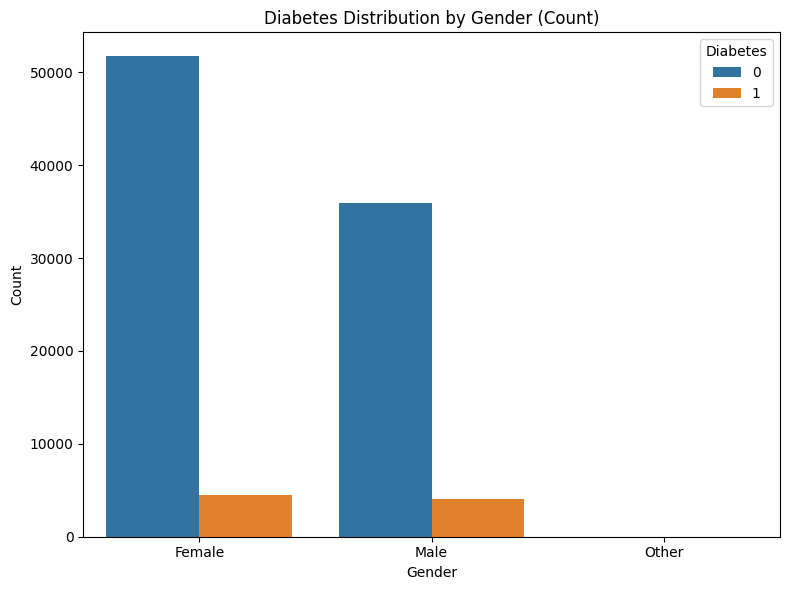

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'df' loaded with your dataset
# If not, replace this with your data loading method
# Example of loading a CSV file:
# df = pd.read_csv('your_diabetes_dataset.csv')

# Ensure df is a pandas DataFrame (redundant if it already is)
df = pd.DataFrame(df)

# 1. Using seaborn.countplot() - Showing Counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Diabetes Distribution by Gender (Count)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=sorted(df['diabetes'].unique()))  # Use actual unique diabetes values
plt.tight_layout()
plt.show()


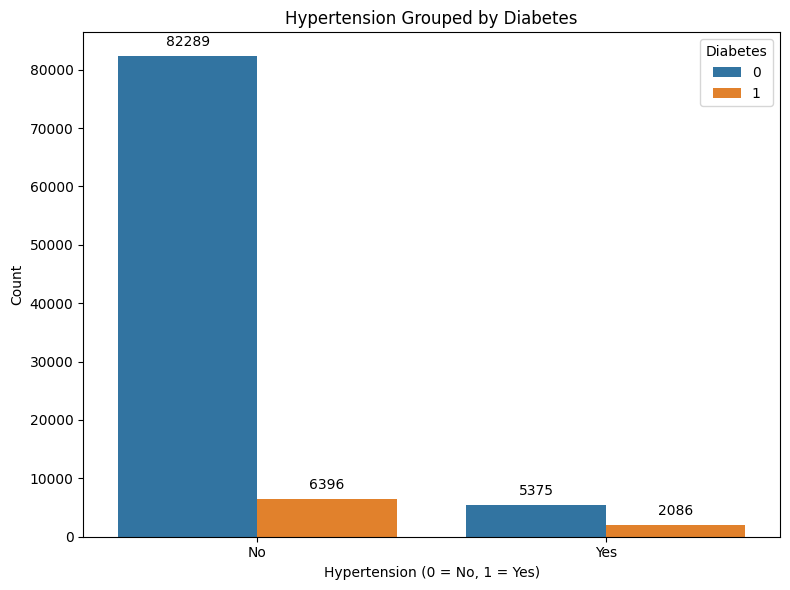

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'df' loaded with your dataset
# If not, replace this with your data loading method
# Example of loading a CSV file:
# df = pd.read_csv('your_diabetes_dataset.csv')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension Grouped by Diabetes')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')  # Adjust label if your encoding is different
plt.ylabel('Count')
plt.xticks(ticks=df['hypertension'].unique(), labels=sorted(['No' if val == 0 else 'Yes' for val in df['hypertension'].unique()])) # Dynamic labels
plt.legend(title='Diabetes', labels=sorted(df['diabetes'].unique()))

# Add annotations to the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

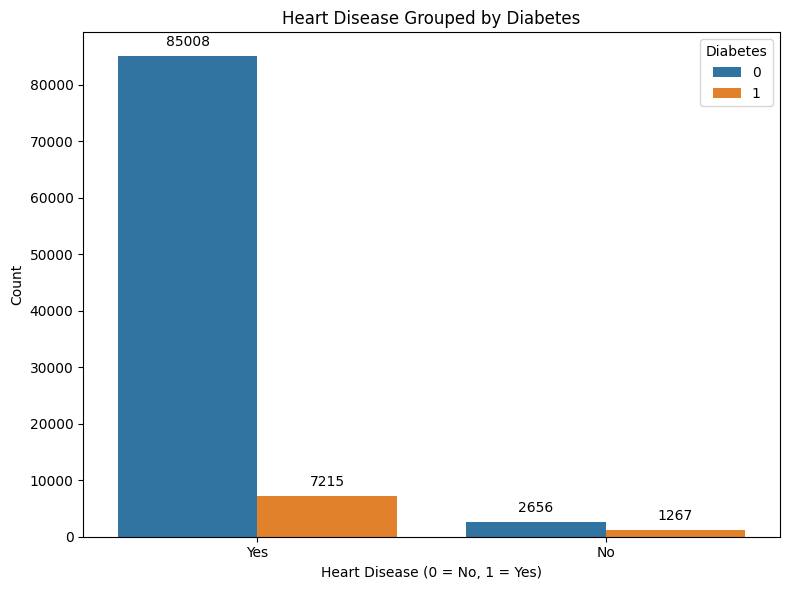

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'df' loaded with your dataset
# If not, replace this with your data loading method
# Example of loading a CSV file:
# df = pd.read_csv('your_diabetes_dataset.csv')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart Disease Grouped by Diabetes')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')  # Adjust label if your encoding is different
plt.ylabel('Count')
plt.xticks(ticks=df['heart_disease'].unique(), labels=sorted(['No' if val == 0 else 'Yes' for val in df['heart_disease'].unique()])) # Dynamic labels
plt.legend(title='Diabetes', labels=sorted(df['diabetes'].unique()))

# Add annotations to the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

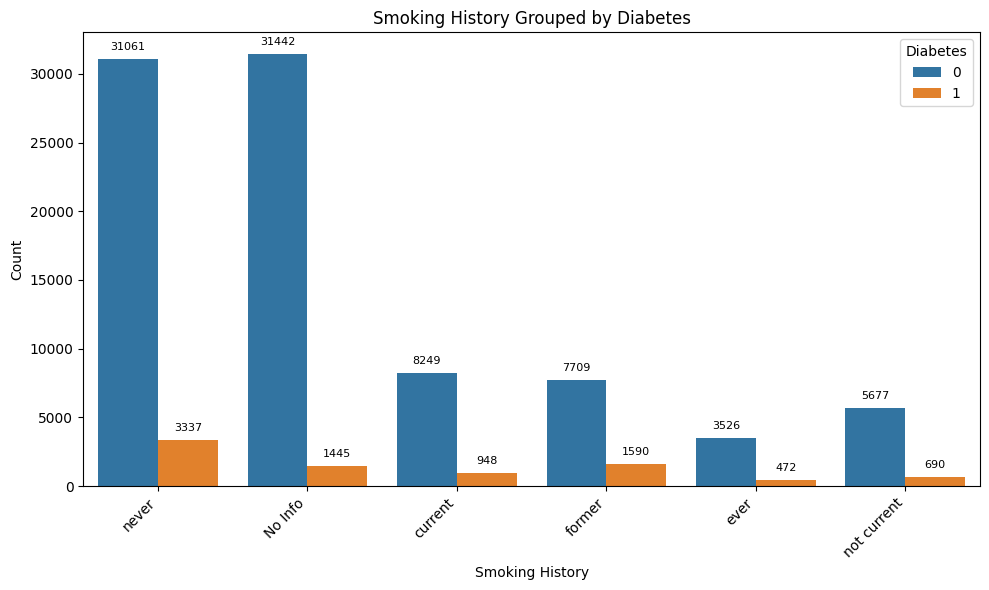

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'df' loaded with your dataset
# If not, replace this with your data loading method
# Example of loading a CSV file:
# df = pd.read_csv('your_diabetes_dataset.csv')

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = sns.countplot(data=df, x='smoking_history', hue='diabetes')
plt.title('Smoking History Grouped by Diabetes')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Diabetes', labels=sorted(df['diabetes'].unique()))

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

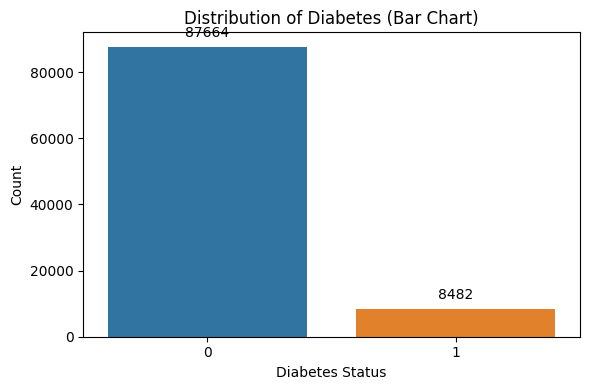

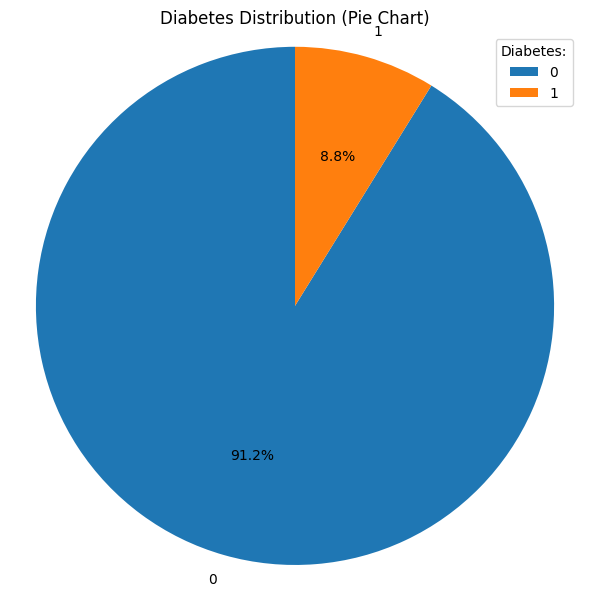

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'df' loaded with your dataset
# If not, replace this with your data loading method
# Example of loading a CSV file:
# df = pd.read_csv('your_diabetes_dataset.csv')

# Bar Chart of Diabetes
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='diabetes')
plt.title('Distribution of Diabetes (Bar Chart)')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(ticks=df['diabetes'].unique(), labels=sorted(df['diabetes'].unique()))

# Add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

# Pie Chart of Diabetes Distribution
plt.figure(figsize=(6, 6))
diabetes_counts = df['diabetes'].value_counts()
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Diabetes:', labels=diabetes_counts.index, loc='best')
plt.tight_layout()
plt.show()

Minimum BMI: 10.01
Maximum BMI: 95.69
Average BMI: 27.32146111122667

Diabetes Counts:
diabetes_label
No Diabetes    87664
Diabetes        8482
Name: count, dtype: int64

BMI Statistics by Diabetes Status:
                  min    max
diabetes_label              
Diabetes        10.98  88.72
No Diabetes     10.01  95.69


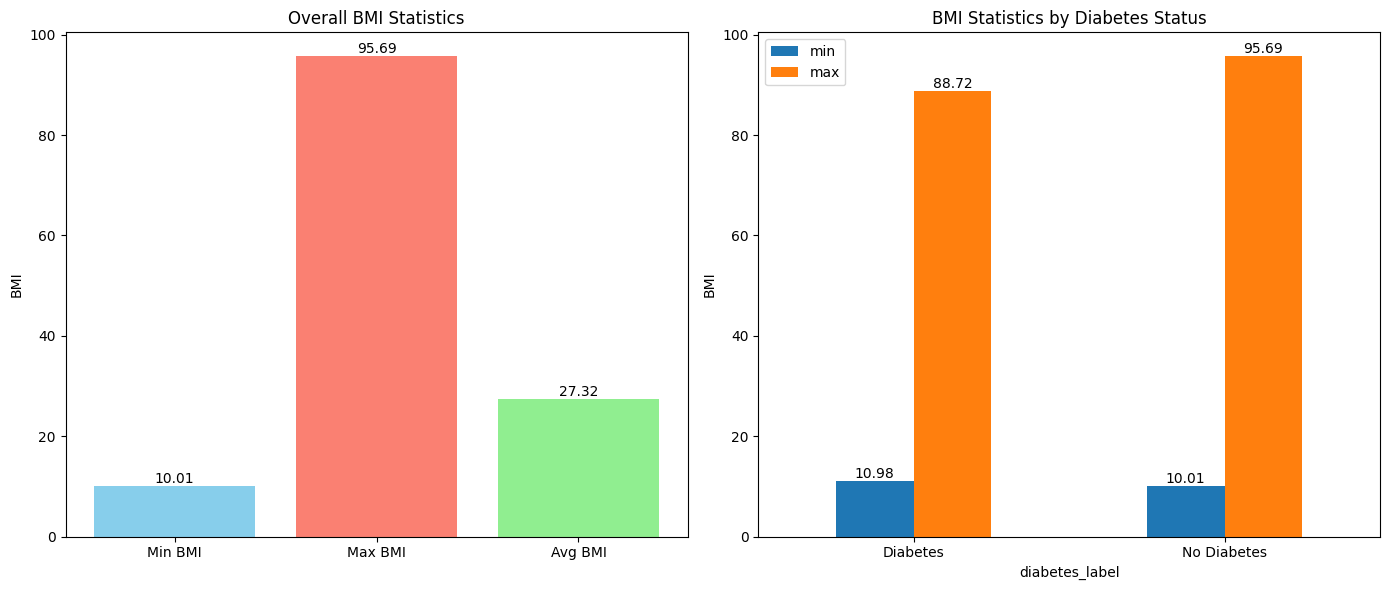

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame called 'df' loaded with your dataset
# If not, replace this with your data loading method
# Example of loading a CSV file:
# df = pd.read_csv('your_diabetes_dataset.csv')

# Convert 'diabetes' column to categorical for better labeling
df['diabetes_label'] = df['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Calculate minimum, maximum, and average BMI
min_bmi = df['bmi'].min()
max_bmi = df['bmi'].max()
avg_bmi = df['bmi'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes_label'].value_counts()

# Group by diabetes status and calculate min and max BMI
grouped_bmi = df.groupby('diabetes_label')['bmi'].agg(['min', 'max'])

# Print the results
print(f"Minimum BMI: {min_bmi}")
print(f"Maximum BMI: {max_bmi}")
print(f"Average BMI: {avg_bmi}")
print("\nDiabetes Counts:")
print(diabetes_counts)
print("\nBMI Statistics by Diabetes Status:")
print(grouped_bmi)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average BMI
bars_bmi = axes[0].bar(['Min BMI', 'Max BMI', 'Avg BMI'], [min_bmi, max_bmi, avg_bmi], color=['skyblue', 'salmon', 'lightgreen'])
axes[0].set_title('Overall BMI Statistics')
axes[0].set_ylabel('BMI')
for bar in bars_bmi:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot for min and max BMI grouped by diabetes status
grouped_bars_bmi = grouped_bmi.plot(kind='bar', ax=axes[1])
axes[1].set_title('BMI Statistics by Diabetes Status')
axes[1].set_ylabel('BMI')
axes[1].set_xticklabels(grouped_bmi.index, rotation=0)  # Rotate x-axis labels for readability
for p in grouped_bars_bmi.patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()



**Key Facts of Diabetes based on given data:** 

Minimum BMI: 10.98: The lowest BMI among individuals with diabetes is 10.98 (still severely underweight).
Maximum BMI: 88.72: The highest BMI among individuals with diabetes is 88.72 (extremely obese).
No Diabetes:
Minimum BMI: 10.01: The lowest BMI among individuals without diabetes is 10.01 (severely underweight).
Maximum BMI: 95.69: The highest BMI among individuals without diabetes is 95.69 (extremely obese).

Average BMI: 27.32: This is the mean BMI across all individuals in your dataset. A BMI of 27.32 falls into the "overweight" category (according to the World Health Organization's classifications, which are typically:
Underweight: < 18.5
Normal weight: 18.5 - 24.9
Overweight: 25 - 29.9
Obese: ≥ 30)

In [18]:
import pandas as pd

# Group by diabetes status
grouped_age = df.groupby('diabetes')['age']

# Calculate descriptive statistics for each group
age_stats = grouped_age.describe()
print("Age Statistics by Diabetes Status:")
print(age_stats)

# Get min and max age for each group (as you did before)
min_max_age = grouped_age.agg(['min', 'max'])
print("\nMinimum and Maximum Age by Diabetes Status:")
print(min_max_age)

# Get mean and median age for each group
mean_median_age = grouped_age.agg(['mean', 'median'])
print("\nMean and Median Age by Diabetes Status:")
print(mean_median_age)

Age Statistics by Diabetes Status:
            count       mean        std   min   25%   50%   75%   max
diabetes                                                             
0         87664.0  39.943229  22.228281  0.08  22.0  40.0  57.0  80.0
1          8482.0  60.925961  14.545301  3.00  52.0  62.0  72.0  80.0

Minimum and Maximum Age by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0

Mean and Median Age by Diabetes Status:
               mean  median
diabetes                   
0         39.943229    40.0
1         60.925961    62.0


Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297818
Diabetes Counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


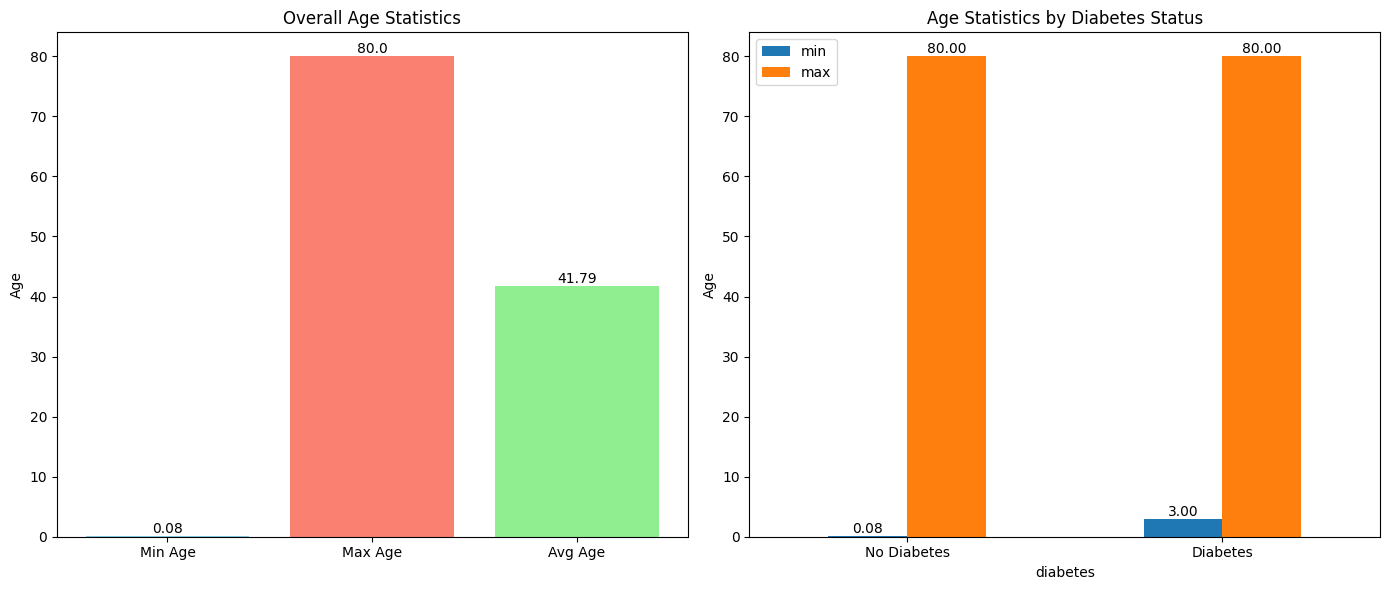

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'df' loaded with your dataset
# If not, replace this with your data loading method
# Example of loading a CSV file:
# df = pd.read_csv('your_diabetes_dataset.csv')

# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max age
grouped_age = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_age)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
bars_age = axes[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['skyblue', 'salmon', 'lightgreen'])
axes[0].set_title('Overall Age Statistics')
axes[0].set_ylabel('Age')
for bar in bars_age:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot for min and max ages grouped by diabetes status
grouped_bars_age = grouped_age.plot(kind='bar', ax=axes[1])
axes[1].set_title('Age Statistics by Diabetes Status')
axes[1].set_ylabel('Age')
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)  # Ensure correct labels
for p in grouped_bars_age.patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Overall Age Statistics:**

Minimum age: 0.08: The youngest individual in your dataset is approximately 0.08 years old. This translates to roughly one month old (0.08 * 12 months). This suggests you might have data including infants.
Maximum age: 80.0: The oldest individual in your dataset is 80 years old.
Average age: 41.79: The mean age of all individuals in your dataset is approximately 41.79 years. This gives you a central tendency of the age distribution.

# Encode Labels
* Columns Like Smoking History & Gender
* LabelEncoder converts these categorical strings into a numerical format that these algorithms can understand and work with.

In [20]:
# Encode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

# Principal Component Analysis (PCA)

/tmp/ipykernel_13/2434487342.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(f'Max: PC {max_index + 1}',


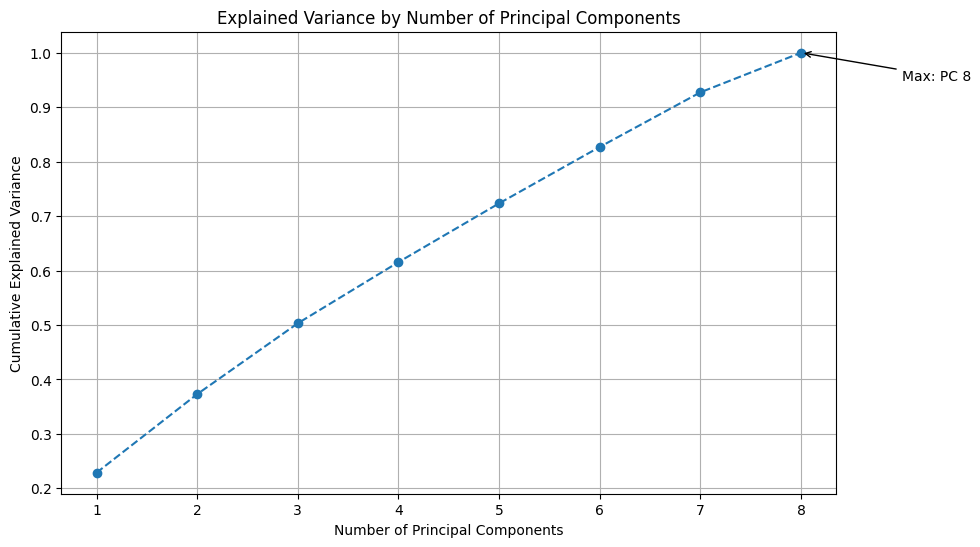

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3729 cumulative explained variance
Principal Component 3: 0.5031 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [21]:
# Assume df is the dataframe
from sklearn.decomposition import PCA

# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

* Best Case: Principal Component 8: 1.0000 cumulative explained variance

In [22]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 'Scaler' and 'pca' are the fitted StandardScaler and PCA objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [23]:
import os
print(os.listdir('.'))

['scaler.pkl', '__notebook__.ipynb', 'pca.pkl']


In [24]:
df[:3]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,diabetes_label
0,0,80.0,0,1,4,25.19,6.6,140,0,No Diabetes
1,0,54.0,0,0,0,27.32,6.6,80,0,No Diabetes
2,1,28.0,0,0,4,27.32,5.7,158,0,No Diabetes


In [25]:
df.shape


(96146, 10)

In [26]:
df['diabetes'] = df['diabetes'].map({'No Diabetes': 0, 'Diabetes': 1})

In [27]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [28]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'diabetes_label', 'gender_1',
       'gender_2', 'smoking_history_1', 'smoking_history_2',
       'smoking_history_3', 'smoking_history_4', 'smoking_history_5'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  96146 non-null  float64
 1   hypertension         96146 non-null  int64  
 2   heart_disease        96146 non-null  int64  
 3   bmi                  96146 non-null  float64
 4   HbA1c_level          96146 non-null  float64
 5   blood_glucose_level  96146 non-null  int64  
 6   diabetes             0 non-null      float64
 7   diabetes_label       96146 non-null  object 
 8   gender_1             96146 non-null  bool   
 9   gender_2             96146 non-null  bool   
 10  smoking_history_1    96146 non-null  bool   
 11  smoking_history_2    96146 non-null  bool   
 12  smoking_history_3    96146 non-null  bool   
 13  smoking_history_4    96146 non-null  bool   
 14  smoking_history_5    96146 non-null  bool   
dtypes: bool(7), float64(4), int64(3), object(

In [30]:
print(df['diabetes_label'].unique())
# Based on the output, apply the mapping:
df['diabetes'] = df['diabetes_label'].map({'Not Diabetic': 0, 'Diabetic': 1})
# OR
df['diabetes'] = df['diabetes_label'].map({'No': 0, 'Yes': 1})
# ... and so on, based on the actual unique values

['No Diabetes' 'Diabetes']


In [31]:
df.info

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99994  36.0             0              0  24.60          4.8   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes diabetes_label  gender_1  gender_2  \
0                      140       NaN    No Diabetes     False     False   
1                       80       NaN    No Diabet

In [32]:
df['diabetes'] = df['diabetes_label'].map({'No Diabetes': 0, 'Diabetes': 1})

In [33]:
df = df.drop(['diabetes', 'diabetes_label'], axis=1)

In [34]:
df[:3]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_1,gender_2,smoking_history_1,smoking_history_2,smoking_history_3,smoking_history_4,smoking_history_5
0,80.0,0,1,25.19,6.6,140,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,True,False,False,False,False,True,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  96146 non-null  float64
 1   hypertension         96146 non-null  int64  
 2   heart_disease        96146 non-null  int64  
 3   bmi                  96146 non-null  float64
 4   HbA1c_level          96146 non-null  float64
 5   blood_glucose_level  96146 non-null  int64  
 6   gender_1             96146 non-null  bool   
 7   gender_2             96146 non-null  bool   
 8   smoking_history_1    96146 non-null  bool   
 9   smoking_history_2    96146 non-null  bool   
 10  smoking_history_3    96146 non-null  bool   
 11  smoking_history_4    96146 non-null  bool   
 12  smoking_history_5    96146 non-null  bool   
dtypes: bool(7), float64(3), int64(3)
memory usage: 5.8 MB


In [36]:
df.describe

<bound method NDFrame.describe of         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99994  36.0             0              0  24.60          4.8   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  gender_1  gender_2  smoking_history_1  \
0                      140     False     False              False   
1                       80     False     False             

# Model: GaussianNB

In [37]:
#splitting data 60 40 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model_Naive_Bayes = GaussianNB()
model_Naive_Bayes.fit(X_train, y_train)






GaussianNB()

In [38]:
#Make Predictions
y_pred = model_Naive_Bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', matrix)

Accuracy: 0.8995
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     35034
           1       0.45      0.64      0.53      3425

    accuracy                           0.90     38459
   macro avg       0.71      0.78      0.74     38459
weighted avg       0.92      0.90      0.91     38459

Confusion Matrix:
 [[32412  2622]
 [ 1243  2182]]


Confusion Matrix Based on "Naive Bayes Classifiers" :

                  Predicted Negative    Predicted Positive
Actual Negative      TN = 32412             FP = 2622
Actual Positive      FN = 1243              TP = 2182

# Model named as "model_Naive_Bayes" save/download using pickle

In [39]:
import pickle

# Save the model
with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(model_Naive_Bayes, f)

In [40]:
import os
print(os.listdir('.'))

['scaler.pkl', '__notebook__.ipynb', 'Diabetes_model.pkl', 'pca.pkl']


# Visualize: Confusion Matrix 

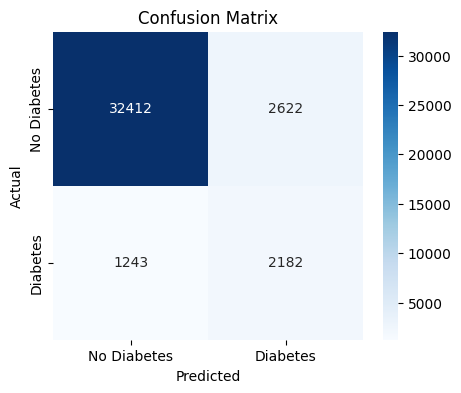

In [41]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Prediction Using Raw Data 


In [42]:
# Features: original form
features_original = ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender']

# 10 random custom data entries with original features
smoking_histories = ['never', 'smokes', 'formerly smoked', 'no info', 'not current']
genders = ['Male', 'Female']
random.seed(42)  # for reproducibility

raw_custom_data = []
for _ in range(10):
    age = round(random.uniform(18, 85), 1)
    hypertension = random.randint(0, 1)
    heart_disease = random.randint(0, 1)
    smoking_history = random.choice(smoking_histories)
    bmi = round(random.uniform(15, 40), 1)
    hba1c = round(random.uniform(4.0, 10.0), 1)
    glucose = random.randint(70, 250)
    gender = random.choice(genders)
    
    raw_custom_data.append([age, hypertension, heart_disease, smoking_history, bmi, hba1c, glucose, gender])
    custom_df_original = pd.DataFrame(raw_custom_data, columns=features_original)

# One-Hot Encode the custom data
custom_df_encoded = pd.get_dummies(custom_df_original, columns=['gender', 'smoking_history'], drop_first=True)

# Ensure the order of columns matches the training data (after encoding)
# Get the feature names that the scaler was fitted on
expected_columns = [col for col in scaler.feature_names_in_ if col != 'diabetes'] # Exclude the target if it was in there

# Add any missing columns with 0 and reorder
for col in expected_columns:
    if col not in custom_df_encoded.columns:
        custom_df_encoded[col] = 0
custom_df_encoded = custom_df_encoded[expected_columns]

# 3. Standardize the custom data using the *fitted* scaler
custom_X_scaled = scaler.transform(custom_df_encoded)

# 4. Apply PCA transformation using the *fitted* PCA
custom_X_pca = pca.transform(custom_X_scaled)

# 5. Make predictions
custom_predictions = model_Naive_Bayes.predict(custom_X_pca)

# 6. Print predictions
for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Patient {i+1} is not predicted to have diabetes.")
    else:
        print(f"Patient {i+1} is predicted to have diabetes.")

print("\nCustom Data:")
print(custom_df_original)
print("\nPredictions:")
for i, pred in enumerate(custom_predictions):
    print(f"Patient {i+1}: {'Diabetes' if pred == 1 else 'No Diabetes'}")

Patient 1 is predicted to have diabetes.
Patient 2 is predicted to have diabetes.
Patient 3 is predicted to have diabetes.
Patient 4 is predicted to have diabetes.
Patient 5 is predicted to have diabetes.
Patient 6 is predicted to have diabetes.
Patient 7 is not predicted to have diabetes.
Patient 8 is predicted to have diabetes.
Patient 9 is predicted to have diabetes.
Patient 10 is not predicted to have diabetes.

Custom Data:
    age  hypertension  heart_disease  smoking_history   bmi  HbA1c_level  \
0  60.8             0              1           smokes  20.6          8.4   
1  57.6             0              0            never  20.5          7.0   
2  66.0             1              0          no info  29.7          8.9   
3  64.8             1              1           smokes  20.4          8.6   
4  43.5             1              1      not current  21.6          4.3   
5  83.2             1              0      not current  22.3          7.8   
6  65.2             0              

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Ending Notes:
--------------------------------------------------------------------------

* This project employs the "Naive Bayes Algorithm," a classification technique, to predict whether a user is diabetic ("Yes") or not ("No") based on their provided input data.
* Managing diabetes involves a combination of healthy lifestyle choices and, in some cases, medication. Key strategies include a balanced diet, regular physical activity, and, if needed, weight management.

**BMI Range:**
Underweight: BMI below 18.5.
Healthy weight: BMI between 18.5 and 24.9.
Overweight: BMI between 25 and 29.9.
Obesity: BMI of 30 or higher, with further classifications into Class 1, Class 2, and Class 3 depending on the specific BMI range.

**HbA1c Range Values:**
Normal: Below 5.7%.
Prediabetes: Between 5.7% and 6.4%.
Diabetes: 6.5% or higher.


**Blood Glucose Levels:**


For non-diabetic adults, a normal HbA1c level is below 5.7%. A level between 5.7% and 6.4% indicates prediabetes, while 6.5% or higher suggests diabetes. 

Fasting (before eating):
Normal: 70 to 99 mg/dL
Prediabetes: 100 to 125 mg/dL
Diabetes: 126 mg/dL or higher on two separate tests 
Random (anytime, without regard to food intake):
Normal: Less than 125 mg/dL
Diabetes: 200 mg/dL or higher 
Two hours after eating:
Normal: Less than 140 mg/dL for adults without diabetes 
Prediabetes/Diabetes: 140 to 199 mg/dL or higher, depending on the individual's target levels 
Important Notes:
Hypoglycemia: Low blood sugar (below 70 mg/dL) can be dangerous. 
Critical values: Some labs have critical values for extremely low (e.g., below 40 mg/dL) or high (e.g., above 400 mg/dL) blood glucose levels. 
Individualized goals: People with diabetes or prediabetes may have individual target blood sugar goals set by their healthcare provider. 

**Hypertension:**

Normal:
Systolic pressure below 120 mmHg AND Diastolic pressure below 80 mmHg. 
Elevated:
Systolic pressure between 120 and 129 mmHg AND Diastolic pressure less than 80 mmHg. 
Stage 1 Hypertension:
Systolic pressure between 130 and 139 mmHg OR Diastolic pressure between 80 and 89 mmHg. 
Stage 2 Hypertension:
Systolic pressure 140 or higher mmHg OR Diastolic pressure 90 or higher mmHg. 
Hypertensive Crisis:
Systolic pressure 180 or higher mmHg OR Diastolic pressure 120 or higher mmHg. 


* By analyzing some common health parameters, this project aims to predict the likelihood of a user developing diabetes.




--------------------------------------------------------------------------

# Deployment At "render.com"

https://ai-classifier-project-diabetes-risk.onrender.com
